## Biased Random-Key Genetic Algorithm

__Placement Procedure__

In [17]:
import math
import time
import random
import numpy as np
import pandas as pd
import concurrent.futures
from model import PlacementProcedure
from model import BRKGA

import matplotlib.pyplot as plt

__Evolutionary Process__

In [18]:
inputs = {}

#package to be packed
inputs['v'] = [
    [100,100,20],
    [50,50,20]
]

#box to be used
inputs['V'] = [
    [210,210,180, 'ABC'],
    [100, 50, 150, 'DEF']
]

print('number of boxes:',len(inputs['v']))


number of boxes: 2


In [19]:
from plot import plot_3D

def draw(decoder, V, title):
    for i in range(decoder.num_opend_bins):
        container = plot_3D(V=V, title = title)
        for box in decoder.Bins[i].load_items:
            container.add_box(box[0], box[1], mode = 'EMS')
        print('Container',i, ':')
        container.findOverlapping()
        container.show()

[(100, 50, 150), (210, 210, 180)]
--> Iteration: 1

Initial Population:
  ->  shape: (70, 4)
  ->  Best Fitness: 1.3333333333333333
Generation : 0  	(Best Fitness: 1.3333333333333333 )
Generation : 1  	(Best Fitness: 1.3333333333333333 )
Generation : 2  	(Best Fitness: 1.3333333333333333 )
Generation : 3  	(Best Fitness: 1.3333333333333333 )
Generation : 4  	(Best Fitness: 1.3333333333333333 )
Generation : 5  	(Best Fitness: 1.3333333333333333 )
Generation : 6  	(Best Fitness: 1.3333333333333333 )
Generation : 7  	(Best Fitness: 1.3333333333333333 )
Generation : 8  	(Best Fitness: 1.3333333333333333 )
Generation : 9  	(Best Fitness: 1.3333333333333333 )
Generation : 10  	(Best Fitness: 1.3333333333333333 )
Generation : 11  	(Best Fitness: 1.3333333333333333 )
Generation : 12  	(Best Fitness: 1.3333333333333333 )
Generation : 13  	(Best Fitness: 1.3333333333333333 )
Generation : 14  	(Best Fitness: 1.3333333333333333 )
Generation : 15  	(Best Fitness: 1.3333333333333333 )
Early stop at 

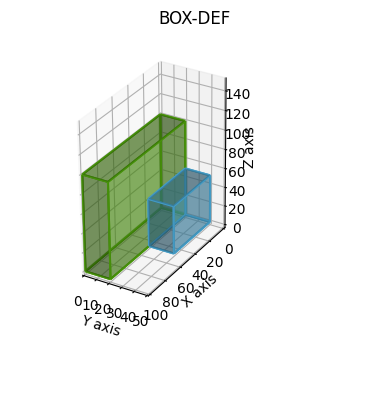

In [20]:
# sort box and packages
inputs['v'].sort(key=lambda x:(max(x[0] * x[1], x[0] * x[2], x[1] * x[2])))
inputs['V'].sort(key=lambda x:(x[0] * x[1] * x[2]))

# filter useable box
total_volume = 0
for x in inputs['v']:
    total_volume += x[0] * x[1] * x[2]
new_list = []
box_dict = []
for x in inputs['V']:
    container_volume = x[0] * x[1] * x[2]
    if container_volume >= total_volume:
        new_list.append((x[0], x[1], x[2]))
        box_dict.append(x)

inputs['V'] = new_list
failed = True
count = 1

# find appropiate box
while(len(inputs['V']) > 0):
    print(inputs['V'])
    print('--> Iteration: ' + str(count))
    start_time = time.time()
    try:
        model = BRKGA(inputs, num_generations = 100, num_individuals=70, num_elites = 10, num_mutants = 7, eliteCProb = 0.7)
        model.fit(patient = 15,verbose = True)
    except:
        print('Exception triggered')
    
    
    print('used bins:',model.used_bins)
    print('time:',time.time() - start_time)
    if(model.used_bins == 1):
        failed = False
        break
    inputs['V'].pop(0)
    box_dict.pop(0)
    count += 1

if failed:
    print('Operations failed, no suitable box')
else:
    inputs['solution'] = model.solution
    decoder = PlacementProcedure(inputs, model.solution)
    print('Choosen box : Box-' + box_dict[0][3])
    print('fitness:',decoder.evaluate())
    draw(decoder, inputs['V'][0], box_dict[0][3])

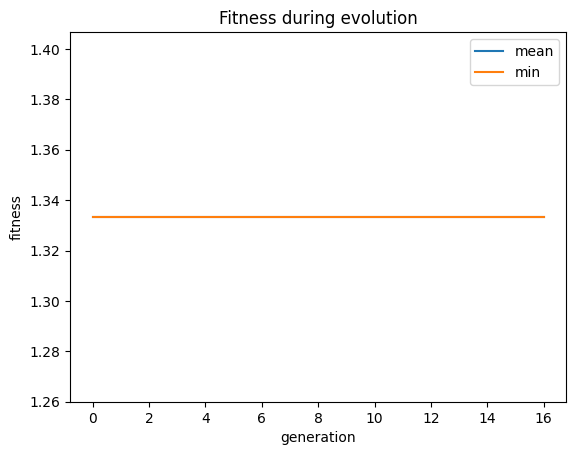

In [15]:
def plot_history(history, tick = 2):
    for target in ['mean', 'min']:
        plt.plot(history[target], label = target)
    plt.title('Fitness during evolution')
    plt.ylabel('fitness')
    plt.xlabel('generation')
    plt.xticks(np.arange(0, len(history['min']), tick))
    plt.legend()
    # h-line for integer
    for i in np.arange(math.ceil(min(history['min'])), int(max(history['mean']))+1):
        plt.axhline(y = i, color = 'g', linestyle = '-') 
    plt.show()

plot_history(model.history)
